## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


In [1]:
# Your code here - remey=mber to use markdown cells for comments as well!
#Jack Pacheco
#JP Ventura Julian Ward

# AI Academy Capstone Project

## Project Goal

The goal for this project is to recommend three key business insights for the company Computing Vision passed on our Exploratory data analysis, data visualizations, and statistical inference

# Load dependencies and packages for data manipulation



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np
import zipfile
import sqlite3
import pandas as pd
from scipy import stats 

%matplotlib inline

# Begin loading in datasets and preparing for mergers

## Prepare data for merging by making sure the right types are in place and renaming columns for easier joining on index

In [3]:
movie_bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
movie_bom = movie_bom.rename(columns={'title':"movie"})
movie_bom['movie'] = movie_bom['movie'].map(lambda x: "Harry Potter and the Deathly Hallows: Part 1" if x == "Harry Potter and the Deathly Hallows Part 1" else x)
movie_bom.head()

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
#pulling in movie budgets dataset and preparing it for joining by changing object types to int. 

## Load in The Number data set, cleanup column information and prepare for join

In [5]:
moviebudgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
moviebudgets["production_budget"] = moviebudgets['production_budget'].map(lambda x: x.strip("$"))
moviebudgets["production_budget"] = moviebudgets['production_budget'].map(lambda x: x.replace(",", ""))

moviebudgets["domestic_gross"] = moviebudgets['domestic_gross'].map(lambda x: x.strip("$"))
moviebudgets["domestic_gross"] = moviebudgets['domestic_gross'].map(lambda x: x.replace(",",""))

moviebudgets["worldwide_gross"] = moviebudgets['worldwide_gross'].map(lambda x: x.strip("$"))
moviebudgets["worldwide_gross"] = moviebudgets['worldwide_gross'].map(lambda x: x.replace(",",""))


moviebudgets= moviebudgets.astype({'production_budget': np.int64, 'domestic_gross': np.int64, 'worldwide_gross': np.int64})
moviebudgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923


# Join Box office movies and the numbers dataset on index movie

In [6]:
#joining movie budgets dataset with bom movie gross so we can have the studio names

In [7]:
movie_total_gross = movie_bom.join(moviebudgets.set_index("movie"), on= ['movie'],rsuffix = "___")
movie_total_gross = movie_total_gross.set_index('id')
movie_total_gross

,movie,studio,domestic_gross,foreign_gross,year,release_date,production_budget,domestic_gross___,worldwide_gross
id,,,,,,,,,
47.0,Toy Story 3,BV,415000000.0,652000000,2010,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09
NaN,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,NaN,NaN,NaN,NaN
NaN,Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010,NaN,NaN,NaN,NaN
38.0,Inception,WB,292600000.0,535700000,2010,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08
27.0,Shrek Forever After,P/DW,238700000.0,513900000,2010,"May 21, 2010",165000000.0,238736787.0,7.562447e+08
...,...,...,...,...,...,...,...,...,...
NaN,The Quake,Magn.,6200.0,NaN,2018,NaN,NaN,NaN,NaN
NaN,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN,NaN,NaN,NaN
NaN,El Pacto,Sony,2500.0,NaN,2018,NaN,NaN,NaN,NaN


In [8]:
movie_tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [9]:
movie_tmdb= movie_tmdb.rename(columns={'original_title':"movie"})
movie_tmdb = movie_tmdb.set_index("movie")


## Pull in tmdb movie dataset and prepare for merger with the existing data frame

In [10]:
#pullin in tmdb ratings so we have budget info and ratings 

In [11]:
movies_and_rating = movie_total_gross.join(movie_tmdb, on = 'movie', how = 'outer', lsuffix = '__')

In [12]:
movies_and_rating

,movie,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,domestic_gross___,worldwide_gross,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
47.0,Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,7.0,"[16, 10751, 35]",10193.0,en,24.445,2010-06-17,Toy Story 3,7.7,8340.0
NaN,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,0.0,"[12, 14, 10751]",12444.0,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0
38.0,Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,4.0,"[28, 878, 12]",27205.0,en,27.920,2010-07-16,Inception,8.3,22186.0
27.0,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,38.0,"[35, 12, 14, 16, 10751]",10192.0,en,15.041,2010-05-16,Shrek Forever After,6.1,3843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,Laboratory Conditions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26512.0,"[27, 18]",488143.0,en,0.600,2018-10-13,Laboratory Conditions,0.0,1.0
NaN,_EXHIBIT_84xxx_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26513.0,"[18, 53]",485975.0,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1.0
NaN,The Last One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26514.0,"[14, 28, 12]",381231.0,en,0.600,2018-10-01,The Last One,0.0,1.0
NaN,Trailer Made,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26515.0,"[10751, 12, 28]",366854.0,en,0.600,2018-06-22,Trailer Made,0.0,1.0


## Continue to clean data by dropping unused and/or redundant columns 

In [13]:
movies_and_rating.drop(["Unnamed: 0",'id','title', 'genre_ids', 'title'],  axis=1, inplace=True)


In [14]:
movies_and_rating = movies_and_rating.set_index('movie')

In [15]:
movies_and_rating

,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,domestic_gross___,worldwide_gross,original_language,popularity,release_date,vote_average,vote_count
movie,,,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,en,24.445,2010-06-17,7.7,8340.0
Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,en,33.533,2010-11-19,7.7,10788.0
Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,en,27.920,2010-07-16,8.3,22186.0
Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,en,15.041,2010-05-16,6.1,3843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Laboratory Conditions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,0.600,2018-10-13,0.0,1.0
_EXHIBIT_84xxx_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,0.600,2018-05-01,0.0,1.0
The Last One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,0.600,2018-10-01,0.0,1.0


In [16]:
#dropping movies that don't have enough information to be of use

## Dropping Na's from the dataset using 6 empty columns in a row as the threshold
We found that at this threshold we can complete the necessary calculations and visualizations with still enough datapoints. 
At a higher threshold there are a lot of entries that only have a couple columns worth of data and these were not valuable to the insights that we created

In [17]:
movies_and_rating.dropna(axis = 0, thresh = 6, inplace = True)


In [18]:
movies_and_rating

,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,domestic_gross___,worldwide_gross,original_language,popularity,release_date,vote_average,vote_count
movie,,,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,en,24.445,2010-06-17,7.7,8340.0
Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,en,33.533,2010-11-19,7.7,10788.0
Inception,WB,292600000.0,535700000,2010.0,"Jul 16, 2010",160000000.0,292576195.0,8.355246e+08,en,27.920,2010-07-16,8.3,22186.0
Shrek Forever After,P/DW,238700000.0,513900000,2010.0,"May 21, 2010",165000000.0,238736787.0,7.562447e+08,en,15.041,2010-05-16,6.1,3843.0
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010.0,"Jun 30, 2010",68000000.0,300531751.0,7.061028e+08,en,20.340,2010-06-23,6.0,4909.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Loving Pablo,Uni.,22000.0,NaN,2018.0,NaN,NaN,NaN,NaN,es,12.937,2018-06-15,6.1,505.0
The Escape,IFC,14000.0,NaN,2018.0,NaN,NaN,NaN,NaN,en,0.600,2015-08-14,7.0,1.0
The Escape,IFC,14000.0,NaN,2018.0,NaN,NaN,NaN,NaN,en,1.176,2016-10-23,6.6,10.0


# Pulling in the imdb ratings using sql

## Merge the desired columns from the tables of interest and prepare for joinging into the master dataset

In [19]:
with zipfile.ZipFile("zippedData/im.db.zip", 'r') as imdb_zip:
    imdb_zip.extractall("zippedData")
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

In [20]:
movie_basics = pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_basics;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

In [21]:
movie_ratings = pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_ratings;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

In [22]:
merged = pd.merge(movie_ratings, movie_basics, on='movie_id')
merged = merged.rename(columns={'primary_title':"movie"})
merged = merged.set_index('movie')
merged

,movie_id,averagerating,numvotes,original_title,start_year,runtime_minutes,genres
movie,,,,,,,
Laiye Je Yaarian,tt10356526,8.3,31,Laiye Je Yaarian,2019,117.0,Romance
Borderless,tt10384606,8.9,559,Borderless,2019,87.0,Documentary
Just Inès,tt1042974,6.4,20,Just Inès,2010,90.0,Drama
The Legend of Hercules,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
Até Onde?,tt1060240,6.5,21,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...
Caisa,tt9805820,8.1,25,Caisa,2018,84.0,Documentary
Code Geass: Lelouch of the Rebellion - Glorification,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
Sisters,tt9851050,4.7,14,Sisters,2019,NaN,"Action,Drama"


In [23]:
master_df = movies_and_rating.join(merged, on = 'movie', how = 'outer', lsuffix = '__')

In [24]:
master_df.dropna(axis = 0, thresh = 9, inplace = True)

In [25]:
master_df = master_df.set_index("movie")

# Drop redundant columns for readability, and Create new columns of interest for calculations and metrics

In [26]:
master_df.drop(["domestic_gross___",'movie_id','original_title'],  axis=1, inplace=True)

In [27]:
master_df["Total_Profit"] = (master_df.worldwide_gross - master_df.production_budget)

## Cleaning up genres

In [28]:
# Split genres into new rows
master_df_genre = master_df.copy()
master_df_genre['genres'] = master_df_genre['genres'].map(lambda x: x.split(',') if type(x) is str else x)
master_df_genre = master_df_genre.explode('genres')

# Drop irrelevant genres **help from Julian
drop_list = ['Talk-Show','Reality-TV','Game-Show','News', 'Short']

for dropg in drop_list:
    master_df_genre = master_df_genre[master_df_genre['genres'] != dropg].copy()
master_df_genre['genres'] = master_df_genre['genres'].map(lambda x: x if x != 'Music' else 'Musical')



In [29]:
master_df = master_df_genre.copy()

In [30]:
master_df_genre_grp = master_df_genre.groupby(['genres'])

In [31]:
master_df["Domestic_Profit_margin"] = (master_df.domestic_gross - master_df.production_budget)/master_df.production_budget

## Initial Visualizations of transformed and combined dataset

<ipython-input-32-e2001fd37efd>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks)


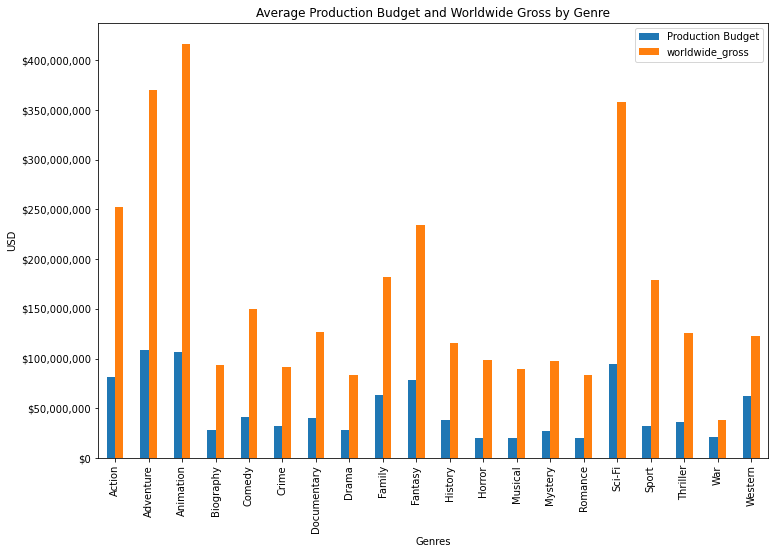

In [32]:
yticks = ["$0", "$50,000,000", "$100,000,000","$150,000,000","$200,000,000","$250,000,000","$300,000,000","$350,000,000","$400,000,000",]

ax = master_df_genre_grp.mean().plot(figsize=(12,8),y=['production_budget','worldwide_gross'],
                                     kind='bar',xlabel='Genres',ylabel='USD', title='Average Production Budget and Worldwide Gross by Genre')


ax.set_yticklabels(yticks)
plt.legend(labels=['Production Budget','worldwide_gross']);

''

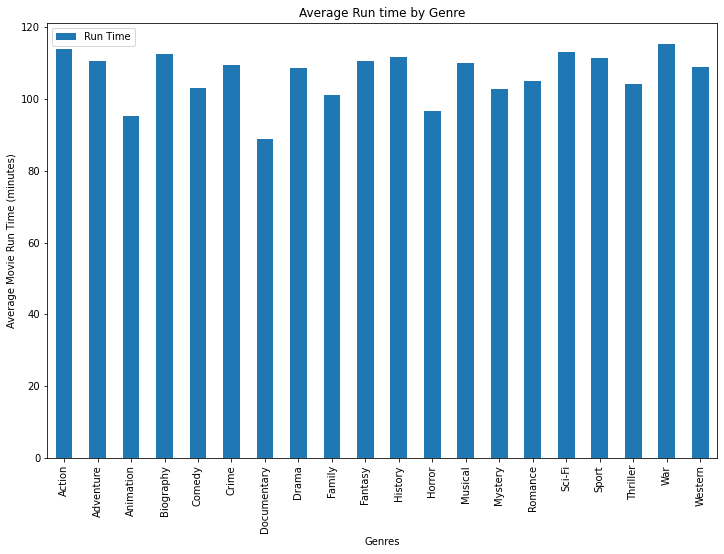

In [33]:

ax = master_df_genre_grp.mean().plot(figsize=(12,8),y=['runtime_minutes'],
                                kind='bar',xlabel='Genres',ylabel='Average Movie Run Time (minutes)', title='Average Run time by Genre')

plt.legend(labels=['Run Time'], loc =0 )
;

In [34]:
master_df["Profit%"] = ((master_df.Total_Profit)/master_df.production_budget)*100

In [35]:
master_df_genre_grp = master_df.groupby(['genres'])

In [36]:
master_df["Profit%"].min()

-100.0

In [37]:
new_df = master_df.copy()
new_df_top_5 = master_df[(master_df.genres == "Horror") | (master_df.genres == "Mystery") |
                         (master_df.genres == "Romance") | (master_df.genres == "Thriller") 
                         | (master_df.genres == "Sport")]
new_df_genre_grp = new_df_top_5.groupby("genres")
new_df_top_5

,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,worldwide_gross,original_language,popularity,release_date,vote_average,vote_count,averagerating,numvotes,start_year,runtime_minutes,genres,Total_Profit,Domestic_Profit_margin,Profit%
movie,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,en,33.533,2010-11-19,7.7,10788.0,7.7,425530.0,2010.0,146.0,Mystery,NaN,NaN,NaN
Black Swan,FoxS,107000000.0,222400000,2010.0,"Dec 3, 2010",13000000.0,331266710.0,en,13.745,2010-12-03,7.6,8374.0,8.0,648854.0,2010.0,108.0,Thriller,318266710.0,7.230769,2448.205462
Robin Hood,Uni.,105300000.0,216400000,2010.0,"May 14, 2010",210000000.0,322459006.0,en,15.444,2010-05-14,6.3,2569.0,5.3,41588.0,2018.0,116.0,Thriller,112459006.0,-0.498571,53.551908
Robin Hood,Uni.,105300000.0,216400000,2010.0,"May 14, 2010",210000000.0,322459006.0,en,39.975,2018-11-21,5.8,1194.0,5.3,41588.0,2018.0,116.0,Thriller,112459006.0,-0.498571,53.551908
Robin Hood,Uni.,105300000.0,216400000,2010.0,"Nov 21, 2018",99000000.0,84747441.0,en,15.444,2010-05-14,6.3,2569.0,5.3,41588.0,2018.0,116.0,Thriller,-14252559.0,0.063636,-14.396524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The House That Jack Built,IFC,88000.0,NaN,2018.0,NaN,NaN,NaN,en,17.556,2018-11-28,7.3,752.0,6.9,35669.0,2018.0,152.0,Horror,NaN,NaN,NaN
The Escape,IFC,14000.0,NaN,2018.0,NaN,NaN,NaN,en,0.600,2015-08-14,7.0,1.0,7.3,247.0,2013.0,107.0,Thriller,NaN,NaN,NaN
The Escape,IFC,14000.0,NaN,2018.0,NaN,NaN,NaN,en,1.176,2016-10-23,6.6,10.0,7.3,247.0,2013.0,107.0,Thriller,NaN,NaN,NaN


''

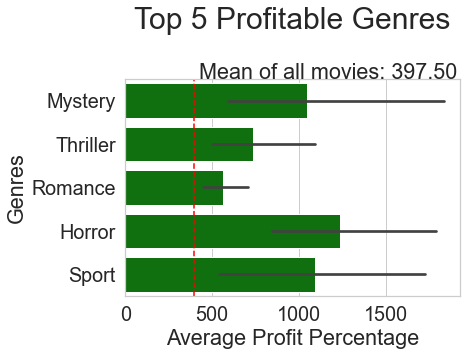

In [38]:
sns.set_theme(style="whitegrid",palette= "deep", font_scale=1.8)

ax = sns.barplot(data=new_df_top_5,y='genres',x='Profit%', color = "green", orient = 'h')
ax.set_ylabel("Genres")
ax.set_xlabel("Average Profit Percentage")
ax.set_title("Top 5 Profitable Genres", size = 30, pad = 50)
ax.axvline(master_df["Profit%"].mean(), ls = '--', color = "red")
plt.text(master_df["Profit%"].mean()+25,-.5,  "Mean of all movies: {:.2f}".format(master_df["Profit%"].mean()))
;

''

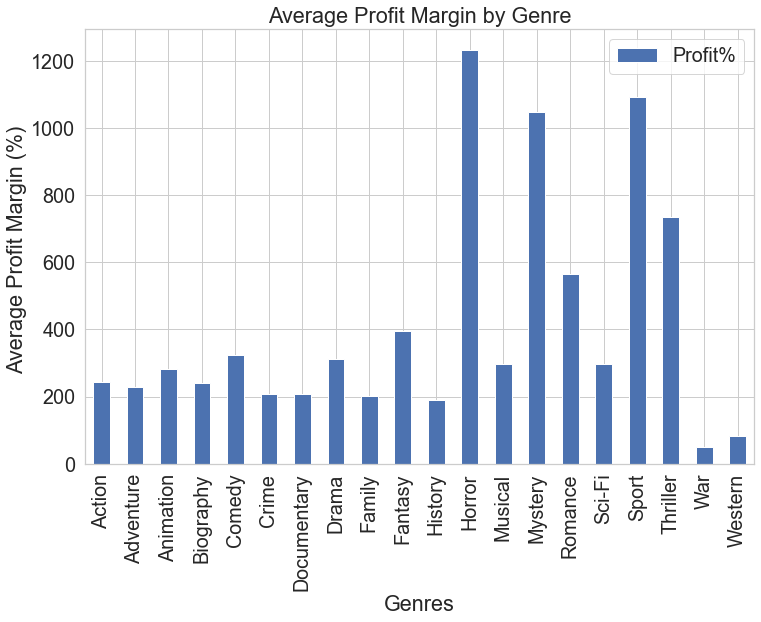

In [39]:

master_df_genre_grp.mean().plot(figsize=(12,8),y=['Profit%'],kind='bar'
                                ,xlabel='Genres',ylabel='Average Profit Margin (%) ',title='Average Profit Margin by Genre')
;

<ipython-input-40-9d14b0fd5df5>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks);


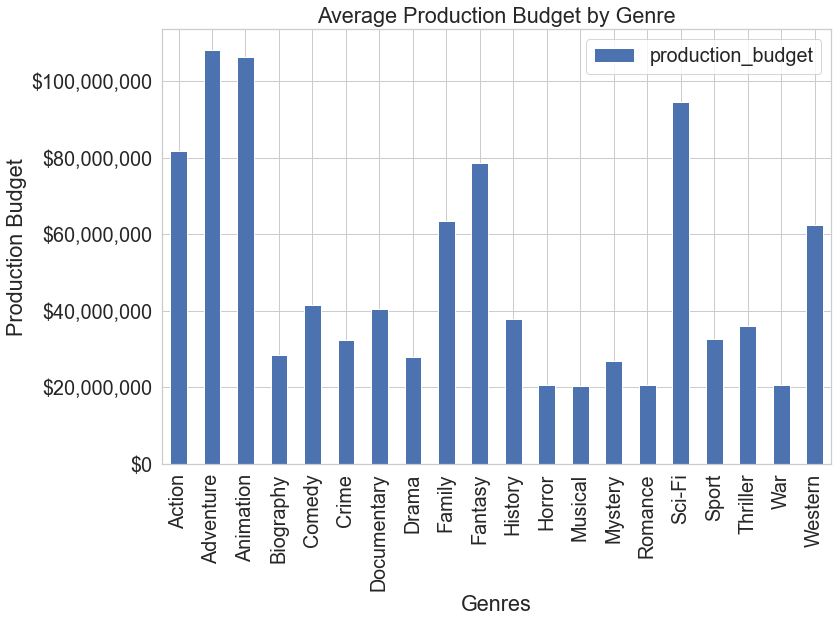

In [40]:
yticks = ["$0", "$20,000,000", "$40,000,000", "$60,000,000", "$80,000,000", "$100,000,000"]

ax = master_df_genre_grp.mean().plot(figsize=(12,8),y=['production_budget'],kind='bar'
                                     ,xlabel='Genres',ylabel='Production Budget',title='Average Production Budget by Genre')
ax.set_yticklabels(yticks);

<ipython-input-41-3bff1ad0a039>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(yticks);


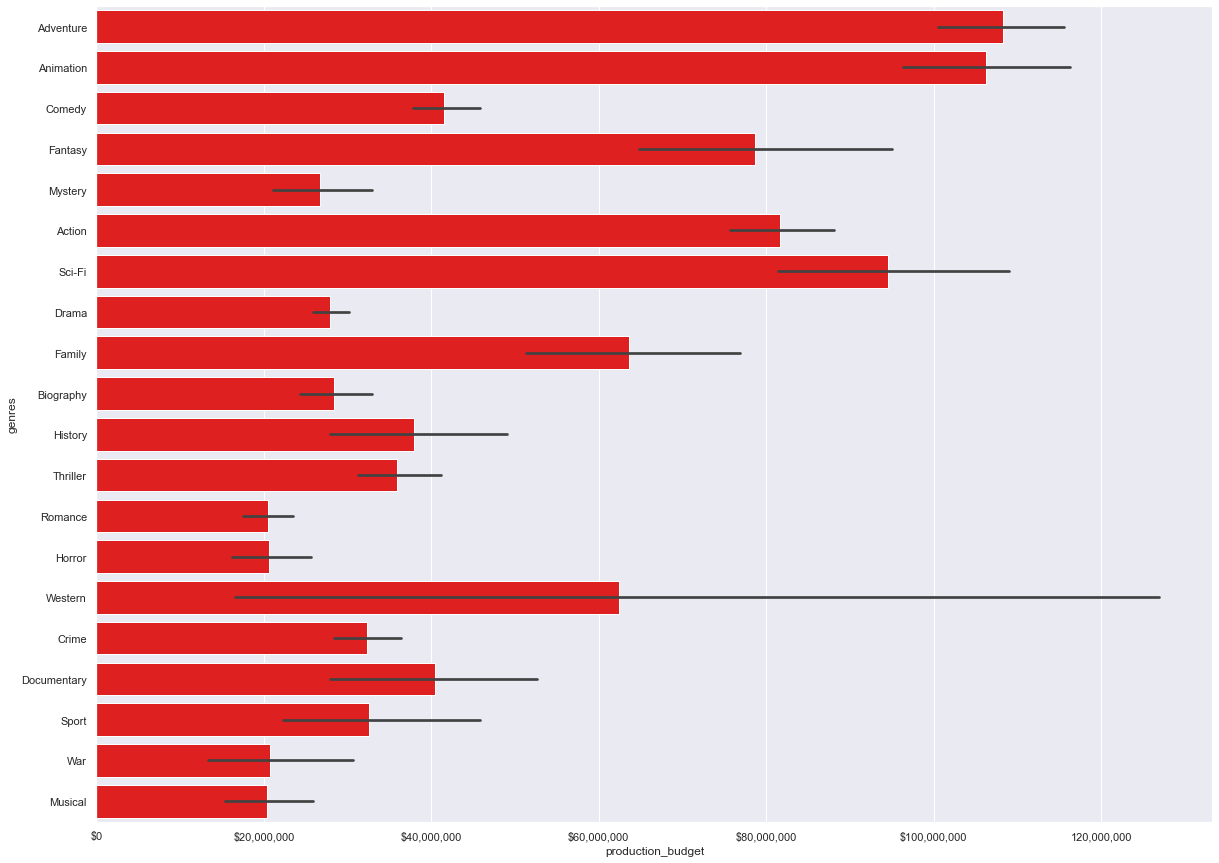

In [41]:
yticks = ["$0", "$20,000,000", "$40,000,000", "$60,000,000", "$80,000,000", "$100,000,000","120,000,000"]

sns.set(rc={"figure.figsize":(20, 15)})
ax = sns.barplot(data=master_df,y='genres',x='production_budget', color = "red", orient = 'h')
ax.set_xticklabels(yticks);

<ipython-input-42-fdc6712c15da>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0",'50,000,000', "100,000,000",


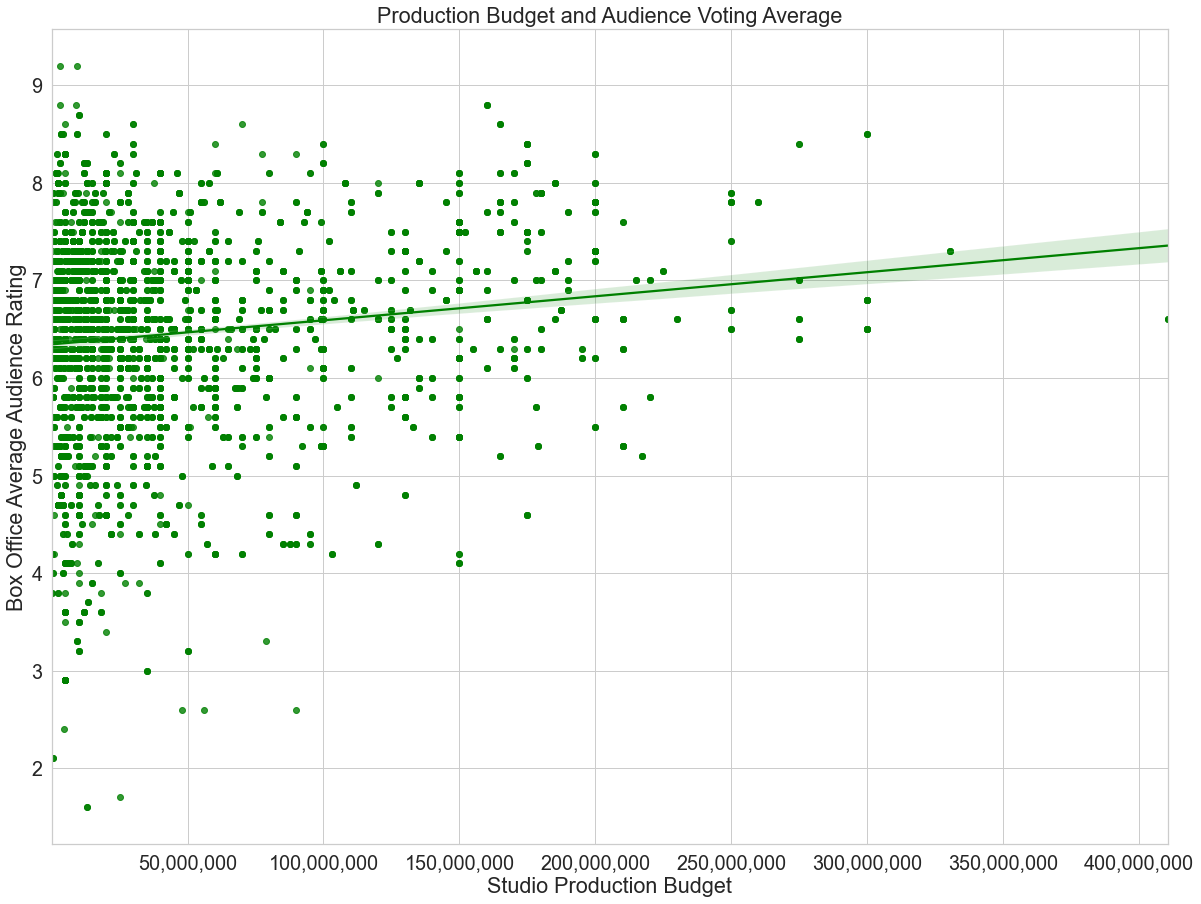

In [42]:
sns.set_theme(style="whitegrid",palette= "deep", font_scale=1.8,color_codes = True)
ax = sns.regplot(x="production_budget",
                    y="averagerating",
                    data=master_df,
                color = "green")
plt.title("Production Budget and Audience Voting Average")
plt.ylabel("Box Office Average Audience Rating")
plt.xlabel("Studio Production Budget")
ax.set_xticklabels(["0",'50,000,000', "100,000,000",
                    "150,000,000","200,000,000","250,000,000",
                   '300,000,000',"350,000,000","400,000,000","450,000,000"]);



<ipython-input-43-9b3393d5efef>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0",'50,000,000', "100,000,000",


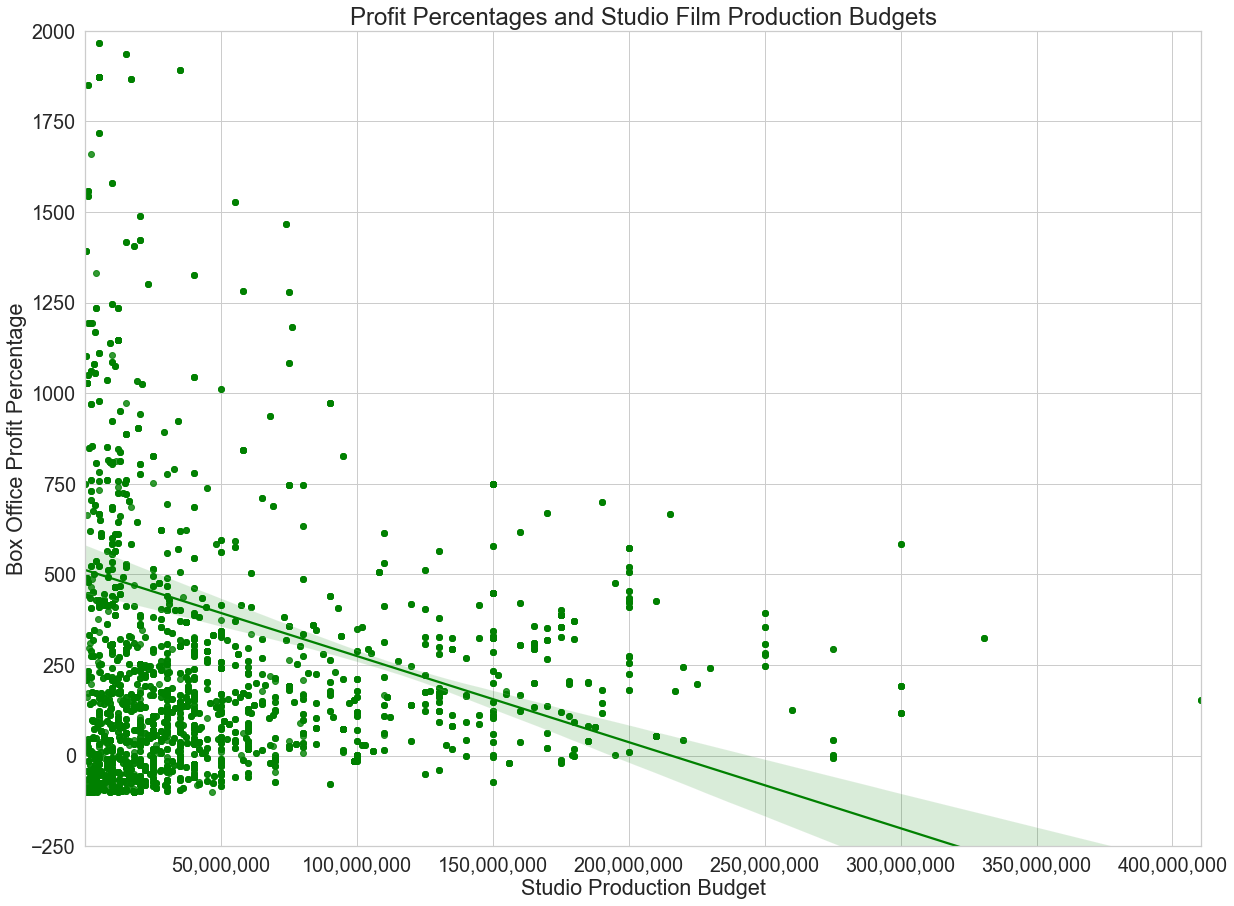

In [43]:
sns.set_theme(style="whitegrid", font_scale=1.8)
ax = sns.regplot(x="production_budget",
                    y="Profit%",
                    data=master_df,
                    color = "green")
plt.ylim(-250, 2000)
plt.title("Profit Percentages and Studio Film Production Budgets",size =24 )
plt.xlabel("Studio Production Budget")
plt.ylabel("Box Office Profit Percentage")
ax.set_xticklabels(["0",'50,000,000', "100,000,000",
                    "150,000,000","200,000,000","250,000,000",
                    '300,000,000',"350,000,000","400,000,000","450,000,000"]);

<ipython-input-44-9a8183321afc>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0",'50,000,000', "100,000,000",


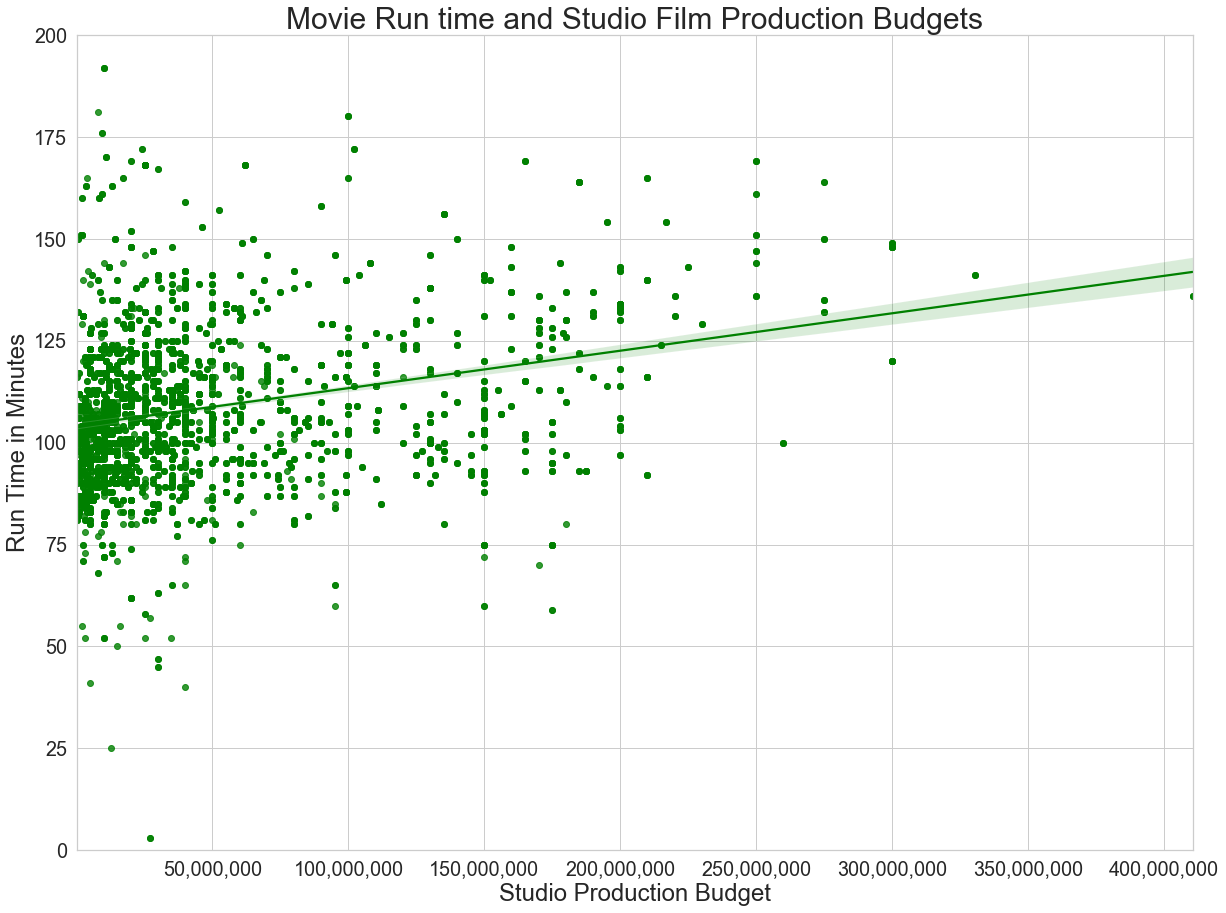

In [44]:
sns.set_theme(style="whitegrid", font_scale=1.8)
ax = sns.regplot(x="production_budget",
                    y="runtime_minutes",
                    data=master_df,
                    color = "green")
plt.ylim(0, 200)
plt.title("Movie Run time and Studio Film Production Budgets",size =30 )
plt.xlabel("Studio Production Budget", size = 24)
plt.ylabel("Run Time in Minutes", size = 24)
ax.set_xticklabels(["0",'50,000,000', "100,000,000",
                    "150,000,000","200,000,000","250,000,000",
                    '300,000,000',"350,000,000","400,000,000","450,000,000"]);

Text(0, 0.5, 'Run Time in Minutes')

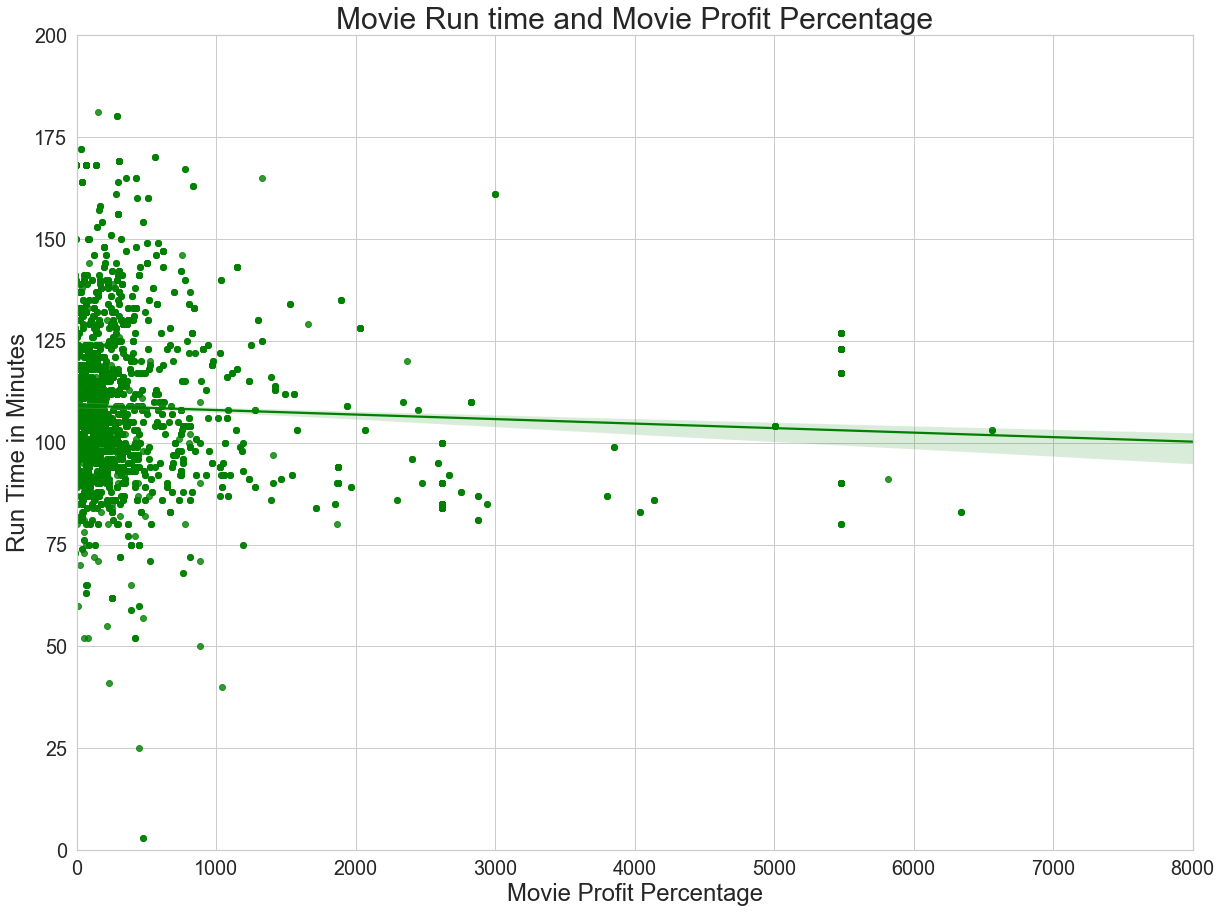

In [45]:
sns.set_theme(style="whitegrid", font_scale=1.8)
ax = sns.regplot(x="Profit%",
                    y="runtime_minutes",
                    data=master_df,
                    color = "green")
plt.ylim(0, 200)
plt.xlim(0,8000)
plt.title("Movie Run time and Movie Profit Percentage",size =30 )
plt.xlabel("Movie Profit Percentage", size = 24)
plt.ylabel("Run Time in Minutes", size = 24)

In [46]:
bins = [30, 90, 150, 210, 270] # bins of 0-0.5 hours, 0.5-1.5 hours, 1.5-2.5 hours, 2.5-3.5 hours, 3.5+ hours
for index, row in master_df.iterrows():
    runtime = row['runtime_minutes']
    if runtime < bins[0]:
        master_df.at[index,'runtime_bins'] = 0
    elif runtime < bins[1]:
        master_df.at[index,'runtime_bins'] = 1
    elif runtime < bins[2]:
        master_df.at[index,'runtime_bins'] = 2
    elif runtime < bins[3]:
        master_df.at[index,'runtime_bins'] = 3
    else:
        master_df.at[index,'runtime_bins'] = 4

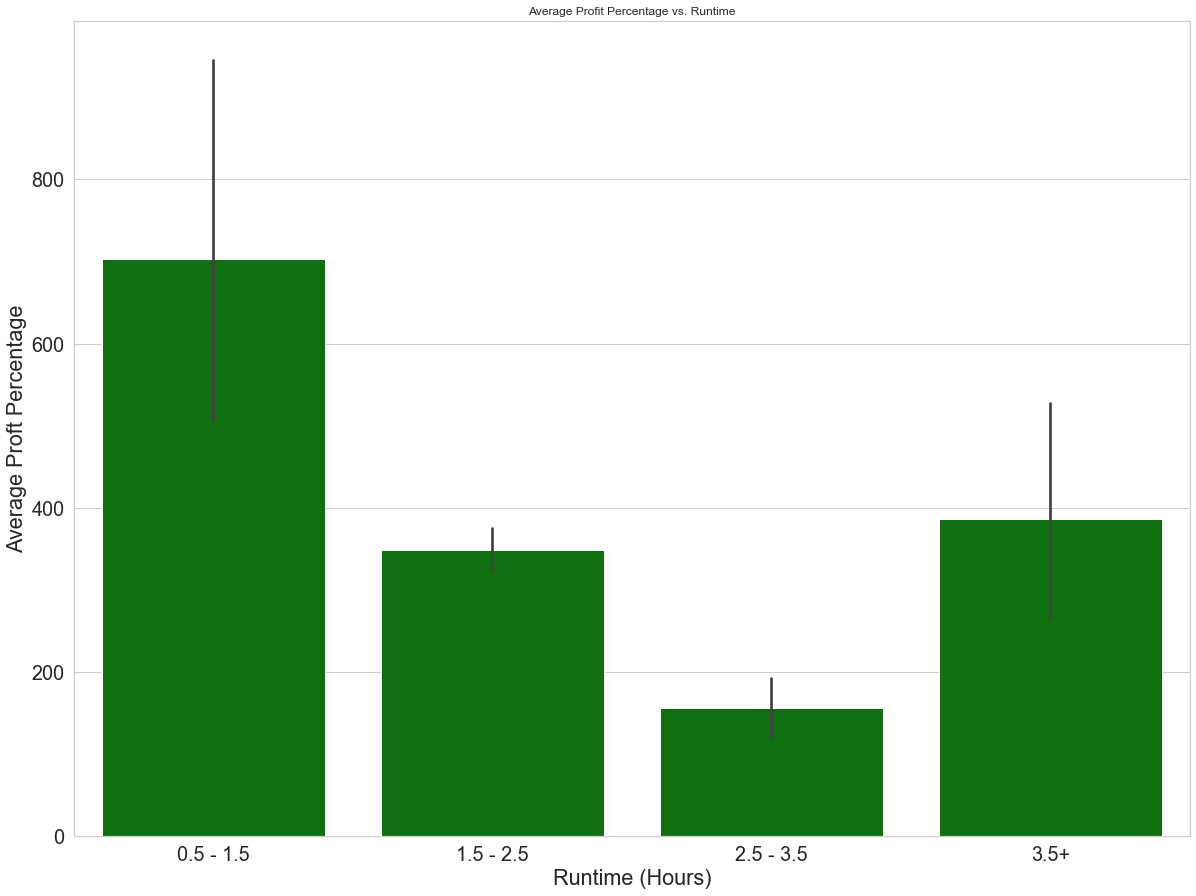

In [47]:
fix, ax = plt.subplots()
sns.set(rc={"figure.figsize":(10, 7)})
plot = sns.barplot(data = master_df, x = 'runtime_bins', y = 'Profit%', color = 'green').set(title = 'Average Profit Percentage vs. Runtime')
ax.set_xticklabels(["0.5 - 1.5","1.5 - 2.5","2.5 - 3.5","3.5+"])
ax.set_xlabel("Runtime (Hours)")
ax.set_ylabel("Average Proft Percentage")
plt.show()

In [48]:
master_df.head()

,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,worldwide_gross,original_language,popularity,release_date,...,vote_count,averagerating,numvotes,start_year,runtime_minutes,genres,Total_Profit,Domestic_Profit_margin,Profit%,runtime_bins
movie,,,,,,,,,,,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,1.068880e+09,en,24.445,2010-06-17,...,8340.0,8.3,682218.0,2010.0,103.0,Adventure,868879522.0,1.075,434.439761,2.0
Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,1.068880e+09,en,24.445,2010-06-17,...,8340.0,8.3,682218.0,2010.0,103.0,Animation,868879522.0,1.075,434.439761,2.0
Toy Story 3,BV,415000000.0,652000000,2010.0,"Jun 18, 2010",200000000.0,1.068880e+09,en,24.445,2010-06-17,...,8340.0,8.3,682218.0,2010.0,103.0,Comedy,868879522.0,1.075,434.439761,2.0
Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,en,33.533,2010-11-19,...,10788.0,7.7,425530.0,2010.0,146.0,Adventure,NaN,NaN,NaN,2.0
Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,en,33.533,2010-11-19,...,10788.0,7.7,425530.0,2010.0,146.0,Fantasy,NaN,NaN,NaN,2.0


# Calculating sample statistics like correlation to determine general trends among key quantitative variables of interest

In [49]:
master_df.production_budget.corr(master_df.Total_Profit)

0.645238306897496

In [50]:
master_df.production_budget.corr(master_df.averagerating)

0.14159000612679062

In [51]:
master_df.production_budget.corr(master_df['Profit%'])

-0.09983003381523184

In [52]:
master_df.runtime_minutes.corr(master_df.averagerating)

0.2647187702866113

In [53]:
master_df.runtime_minutes.corr(master_df["Profit%"])

-0.07883337549573391

In [54]:
master_df.runtime_minutes.corr(master_df["production_budget"])

0.2749719361307824

# Exploratory Statistical Testings on genres 

## Construct new data sets using genres of interest to create samples to compare to the general population

Explored several different variables and their statistical relationship with the general movies population to determine relationships of interest and determine the extent of these relationships

## Statistical testing for horror genre with variables: Profit Percentage, average rating, production budget 

In [55]:
df_horror = master_df[master_df.genres == "Horror"]

In [56]:
df_horror

,studio,domestic_gross,foreign_gross,year,release_date__,production_budget,worldwide_gross,original_language,popularity,release_date,...,vote_count,averagerating,numvotes,start_year,runtime_minutes,genres,Total_Profit,Domestic_Profit_margin,Profit%,runtime_bins
movie,,,,,,,,,,,,,,,,,,,,,
Resident Evil: Afterlife,SGem,60100000.0,240100000,2010.0,"Sep 10, 2010",57500000.0,295874190.0,en,0.667,2010-09-10,...,2119.0,5.9,153270.0,2010.0,96.0,Horror,238374190.0,0.045217,414.563809,2.0
Paranormal Activity 2,Par.,84800000.0,92800000,2010.0,"Oct 20, 2010",3000000.0,177512032.0,en,8.163,2010-10-21,...,1342.0,5.7,93122.0,2010.0,91.0,Horror,174512032.0,27.266667,5817.067733,2.0
The Wolfman,Uni.,62000000.0,77800000,2010.0,"Feb 12, 2010",150000000.0,142634358.0,en,14.030,2010-02-12,...,1009.0,5.8,97873.0,2010.0,103.0,Horror,-7365642.0,-0.586667,-4.910428,2.0
Tooth Fairy,Fox,60000000.0,52400000,2010.0,"Jan 22, 2010",48000000.0,112610386.0,en,12.650,2010-01-22,...,1058.0,2.6,64.0,2019.0,86.0,Horror,64610386.0,0.250000,134.604971,1.0
Piranha 3D,W/Dim.,25000000.0,58200000,2010.0,"Aug 20, 2010",24000000.0,83660160.0,en,11.302,2010-08-20,...,1029.0,5.4,81327.0,2010.0,88.0,Horror,59660160.0,0.041667,248.584000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mandy,RLJ,1200000.0,NaN,2018.0,"Sep 14, 2018",6000000.0,1427656.0,en,0.600,2016-01-24,...,2.0,6.6,44378.0,2018.0,121.0,Horror,-4572344.0,-0.800000,-76.205733,2.0
Mandy,RLJ,1200000.0,NaN,2018.0,"Sep 14, 2018",6000000.0,1427656.0,en,16.240,2018-09-13,...,618.0,6.6,44378.0,2018.0,121.0,Horror,-4572344.0,-0.800000,-76.205733,2.0
Ghost Stories,IFC,149000.0,NaN,2018.0,NaN,NaN,NaN,en,12.187,2018-04-20,...,558.0,6.4,23557.0,2017.0,98.0,Horror,NaN,NaN,NaN,2.0


In [57]:
stats.t.interval(alpha = .95, df = len(master_df)-1, loc = master_df["Profit%"].mean(), scale = master_df["Profit%"].std())

(-2281.3307161595835, 3076.32759540721)

In [58]:
stats.ttest_1samp(df_horror['Profit%'], popmean=master_df["Profit%"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=3.53840163863994, pvalue=0.0005037350881016798)

In [59]:
stats.t.interval(alpha = .95, df = len(df_horror)-1, loc = df_horror["Profit%"].mean(), scale = df_horror["Profit%"].std())

(-5257.722730797313, 7723.925043421251)

In [60]:
#H0: Profit % of horror movies is the same or less than other genres
#HA: Profit % of horror movies is significantly more than other genres
#BAsed on a p-value < .01, we can conclude that horror movies are statistically more likely to provide a profit 
#While statistically more likely the confidence interval of horror movies profit % is (-5266.612988617071, 7744.697262592963)

In [61]:
stats.t.interval(alpha = .95, df = len(df_horror)-1, loc = df_horror["production_budget"].mean(),
                 scale = df_horror["production_budget"].std())

(-45559370.14877157, 86722009.8718485)

In [62]:
stats.ttest_1samp(df_horror['production_budget'], popmean=master_df["production_budget"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=-11.514922943844764, pvalue=1.0187816490342547e-23)

In [63]:
#Horror movies are statistically lower rated than other genres but cheaper to make and more profitable 

In [64]:
stats.t.interval(alpha = .95, df = len(master_df)-1, loc = master_df["averagerating"].mean(),
                 scale = master_df["averagerating"].std())

(4.483192602834453, 8.374823117171479)

In [65]:
stats.t.interval(alpha = .95, df = len(df_horror)-1, loc = df_horror["averagerating"].mean(),
                 scale = df_horror["averagerating"].std())

(3.488166131914891, 7.798245017910892)

In [66]:
stats.ttest_1samp(df_horror['averagerating'], popmean=master_df["averagerating"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=-12.158746859779109, pvalue=1.0646080030052504e-27)

## Statistical testing for history genre with variables: Profit Percentage, average rating, production budget 

In [67]:
df_history = master_df[master_df.genres == "History"]

In [68]:
stats.t.interval(alpha = .95, df = len(df_history)-1, loc = df_history["averagerating"].mean(),
                 scale = df_history["averagerating"].std())

(5.401145570771209, 8.46445442922879)

In [69]:
stats.ttest_1samp(df_history['averagerating'], popmean=master_df["averagerating"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=7.278683992861825, pvalue=3.384491411907055e-11)

In [70]:
#History movies are statistically higher rated than other movies 

In [71]:
stats.t.interval(alpha = .95, df = len(df_history)-1, loc = df_history["Profit%"].mean(), 
                 scale = df_history["Profit%"].std())

(-279.43118204750533, 661.1681850845049)

In [72]:
stats.ttest_1samp(df_history['Profit%'], popmean=master_df["Profit%"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=-6.679621081941746, pvalue=1.0098588830018177e-08)

In [73]:
stats.t.interval(alpha = .95, df = len(df_history)-1, loc = df_history["production_budget"].mean(), 
                 scale =df_history["production_budget"].std())

(-45443309.88826694, 121233140.39674151)

In [74]:
stats.ttest_1samp(df_history['production_budget'], popmean=master_df["production_budget"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=-1.8964229492508784, pvalue=0.06288841014512131)

In [75]:
#History movies are statistically less profitable than other movies, not statistically cheaper, but higher rated. 

## Statistical testing for mystery genre with variables: Profit Percentage, average rating, production budget 

In [76]:
df_mystery = master_df[master_df.genres == "Mystery"]

In [77]:
stats.t.interval(alpha = .95, df = len(df_mystery)-1, loc = df_mystery["averagerating"].mean(),
                 scale = df_mystery["averagerating"].std())

(4.2095948284747315, 8.26296331106015)

In [78]:
stats.ttest_1samp(df_mystery['averagerating'], popmean=master_df["averagerating"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=-2.748469190571817, pvalue=0.0064987286517919265)

In [79]:
stats.t.interval(alpha = .95, df = len(df_mystery)-1, loc = df_mystery["Profit%"].mean(), 
                 scale =df_mystery["Profit%"].std())

(-6319.355459118147, 8414.806136009865)

In [80]:
stats.ttest_1samp(df_mystery['Profit%'], popmean=master_df["Profit%"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=2.0138774368039547, pvalue=0.04603971305391047)

In [81]:
stats.t.interval(alpha = .95, df = len(df_mystery)-1, loc = df_mystery["production_budget"].mean(), 
                 scale =df_mystery["production_budget"].std())

(-40439626.55468299, 93945298.53975761)

In [82]:
stats.ttest_1samp(df_mystery['production_budget'], popmean=master_df["production_budget"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=-7.3137524048466975, pvalue=2.1883185455479766e-11)

In [83]:
#Statistically cheaper to make than other movies 

In [84]:
#mystery movies are statistically lower rated but statistically more profitable 

## Statistical testing for Documentary genre with variables: Profit Percentage, average rating, production budget 

In [85]:
df_doc = master_df[master_df.genres == "Documentary"]

In [86]:
stats.t.interval(alpha = .95, df = len(df_doc)-1, loc = df_doc["averagerating"].mean(),
                 scale = df_doc["averagerating"].std())

(5.707386483626312, 8.853903838954334)

In [87]:
stats.ttest_1samp(df_doc['averagerating'], popmean=master_df["averagerating"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=15.71710942432569, pvalue=1.2717029279209602e-37)

In [88]:
stats.t.interval(alpha = .95, df = len(df_doc)-1, loc = df_doc["Profit%"].mean(), 
                 scale =df_doc["Profit%"].std())

(-491.18942852416234, 905.2888423212319)

In [89]:
stats.ttest_1samp(df_doc['Profit%'], popmean=master_df["Profit%"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=-4.267096315550164, pvalue=6.896867062237742e-05)

In [90]:
#Documentaries are statisticall higher rated but statistically lower profit% 

In [91]:
stats.t.interval(alpha = .95, df = len(df_doc)-1, loc = df_doc["production_budget"].mean(),
                 scale = df_doc["production_budget"].std())

(-61895190.26469246, 142844396.6138988)

In [92]:
stats.ttest_1samp(df_doc['production_budget'], popmean=master_df["production_budget"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=-1.1944332643021827, pvalue=0.23685811669388854)

In [93]:
#Not statistically cheaper to make either

## Statistical testing for Sport genre with variables: Profit Percentage

In [94]:
df_sport = master_df[master_df.genres == "Sport"]

In [95]:
df_sport["Profit%"].mean()

1093.128317480592

In [96]:
stats.t.interval(alpha = .95, df = len(df_sport)-1, loc = df_sport["Profit%"].mean(), 
                 scale =df_sport["Profit%"].std())

(-3057.282009395951, 5243.538644357135)

In [97]:
stats.ttest_1samp(df_sport['Profit%'], popmean=master_df["Profit%"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=2.2454402542510925, pvalue=0.02981361881415251)

## Statistical testing for Thriller genre with variables: Profit Percentage

In [98]:
df_thriller = master_df[master_df.genres == "Thriller"]

In [99]:
df_thriller["Profit%"].mean()

733.7430978347663

In [100]:
stats.t.interval(alpha = .95, df = len(df_thriller)-1, loc = df_thriller["Profit%"].mean(), 
                 scale =df_thriller["Profit%"].std())

(-4388.160373276534, 5855.646568946067)

In [101]:
stats.ttest_1samp(df_thriller['Profit%'], popmean=master_df["Profit%"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=2.267538594407229, pvalue=0.02404996936541532)

## Statistical testing for Romance genre with variables: Profit Percentage

In [102]:
df_romance = master_df[master_df.genres == "Romance"]

In [103]:
df_romance["Profit%"].mean()

563.7883368777519

In [104]:
stats.t.interval(alpha = .95, df = len(df_romance)-1, loc = df_romance["Profit%"].mean(), 
                 scale =df_romance["Profit%"].std())

(-1392.5182404865009, 2520.094914242005)

In [105]:
stats.ttest_1samp(df_romance['Profit%'], popmean=master_df["Profit%"].mean(), nan_policy="omit")

Ttest_1sampResult(statistic=2.444339916049215, pvalue=0.015324699620990664)